### Построение архитектуры нейронной сети для задач бинарной классификации

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot
%matplotlib inline

from sklearn.model_selection import StratifiedKFold

In [2]:
# Загрузка данных
path = 'https://raw.githubusercontent.com/jbrownlee/datasets/master/banknote_authentication.csv'
df = pd.read_csv(path, header = None)
df.head()
# variance
# skewness
# curtosis
# entropy
# class - целевая колонка

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Описательная статистика
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
# Проверяем корреляцию
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [5]:
# Общая информация по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# Распределение данных (большое кол-во уникальных значений т.к. данные нормализованны)
df[0].value_counts()

 0.5706    5
 0.5195    4
 0.3292    4
 0.3798    4
-2.6479    3
          ..
 0.1848    1
 4.5707    1
 2.9742    1
 1.1472    1
-2.5419    1
Name: 0, Length: 1338, dtype: int64

In [7]:
# Датасет сбалансирован
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [8]:
# Разбиваем датасет на фичи и целевое значение
X, y = df.values[:, :-1], df.values[:, -1]
# Приводим X к типу float32
X = X.astype('float32')

In [9]:
X[1]

array([ 4.5459,  8.1674, -2.4586, -1.4621], dtype=float32)

In [10]:
y[1]

0.0

In [11]:
# Создаем LabelEncoder
y = LabelEncoder().fit_transform(y)

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [13]:
# Создаем тестовую и обучающую выборки (и перемешиваем датасет)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [14]:
# Проверка размерностей после разбиения
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


### Создаем нейронную сеть

In [15]:
n_features = X.shape[1] # Размерность X
# Создаем модель
model = Sequential()

model.add(Dense(20, activation = 'relu', input_shape = (n_features, )))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
# Компилируем модель
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [17]:
# Обучение модели
# bacth_size - размер данных, которые мы подаем для обучения
# verbose - позволяет визуализировать процесс обучения
history = model.fit(X_train, y_train,
                    epochs = 20, batch_size = 32,
                    verbose = 1, validation_data = (X_test, y_test))

Epoch 1/20
33/33 [==============================] - 1s 5ms/step - loss: 1.1455 - val_loss: 0.7516
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.6045 - val_loss: 0.4655
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4036 - val_loss: 0.3356
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2976 - val_loss: 0.2458
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2228 - val_loss: 0.1819
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1696 - val_loss: 0.1388
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1292 - val_loss: 0.1052
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0972 - val_loss: 0.0812
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0757 - val_loss: 0.0642
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0519
Epoch 11/20
33/33 [

In [18]:
# Визуализация процесса обучения
yhat = model.predict(X_test)

# model.predict_classes() is deprecated and will be removed after 2021-01-01.
# Please use instead:

# np.argmax(model.predict(x), axis=-1),
# if your model does multi-class classification
# (e.g. if it uses a softmax last-layer activation).

# (model.predict(x) > 0.5).astype("int32"),
# if your model does binary classification
# (e.g. if it uses a sigmoid last-layer activation).

yhat_classes = (model.predict(X_test) > 0.5).astype("int32")

# Валидация прогноза
score = accuracy_score(y_test, yhat_classes)
print(f'Accuracy: {score}')

11/11 [==============================] - 0s 700us/step
Accuracy: 1.0


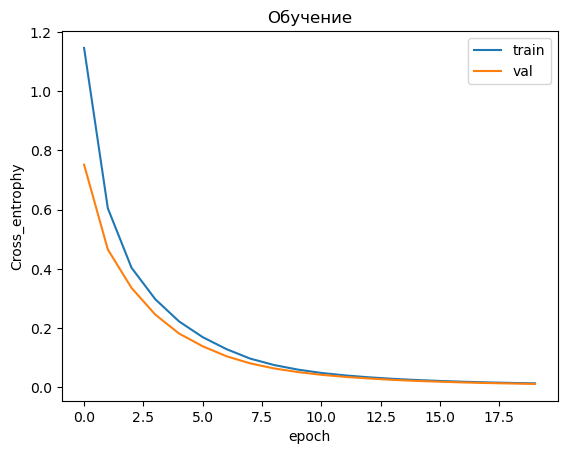

In [19]:
pyplot.title('Обучение')
pyplot.xlabel('epoch')
pyplot.ylabel('Cross_entrophy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 1.0424 - val_loss: 0.5660
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.4323 - val_loss: 0.2976
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2384 - val_loss: 0.1767
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1498 - val_loss: 0.1220
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1051 - val_loss: 0.0919
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0768 - val_loss: 0.0711
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0573 - val_loss: 0.0554
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0455 - val_loss: 0.0443
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0373 - val_loss: 0.0362
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0312 - val_loss: 0.0300
Epoch 11/20
39/39 [

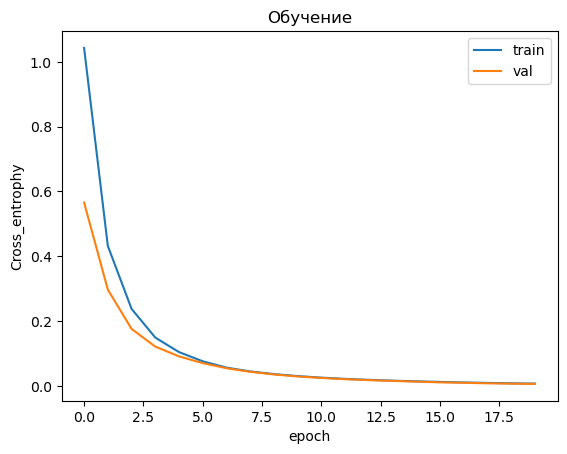

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 0.9083 - val_loss: 0.6117
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.5104 - val_loss: 0.3835
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3555 - val_loss: 0.2806
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2758 - val_loss: 0.2142
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2013 - val_loss: 0.1306
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1302 - val_loss: 0.0835
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0855 - val_loss: 0.0516
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0356
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0267
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0364 - val_loss: 0.0209
Epoch

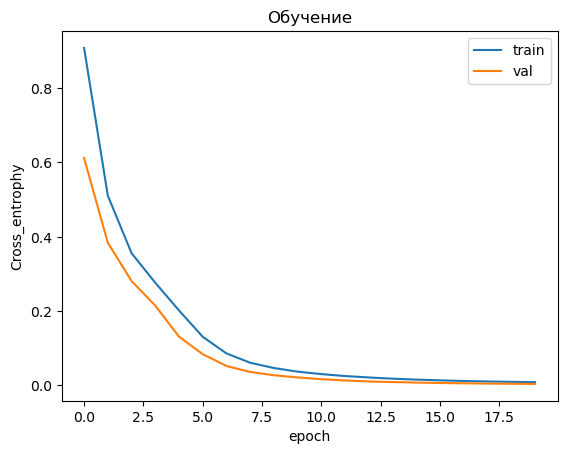

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 0.6308 - val_loss: 0.5148
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.4424 - val_loss: 0.3749
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2993 - val_loss: 0.2792
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2112 - val_loss: 0.2132
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1462 - val_loss: 0.1599
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0936 - val_loss: 0.1100
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0593 - val_loss: 0.0789
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0415 - val_loss: 0.0600
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0492
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0398
Epoch

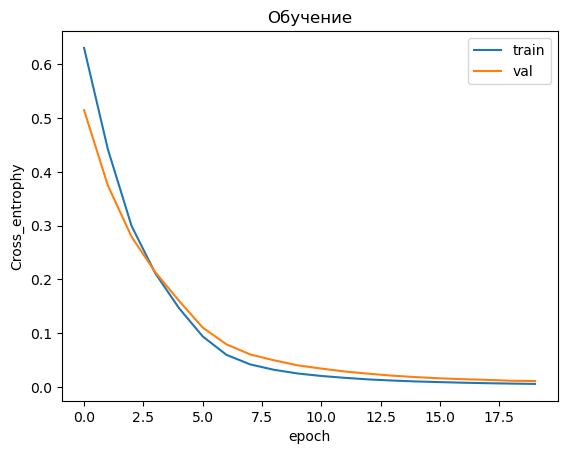

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 1.3490 - val_loss: 0.7177
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.5026 - val_loss: 0.3297
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2462 - val_loss: 0.1827
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1539 - val_loss: 0.1263
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1131 - val_loss: 0.0959
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0885 - val_loss: 0.0753
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0713 - val_loss: 0.0611
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0589 - val_loss: 0.0501
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0494 - val_loss: 0.0416
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0413 - val_loss: 0.0350
Epoch

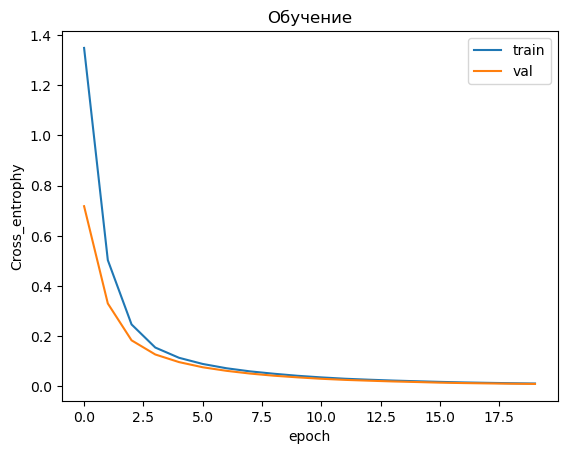

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 0.7316 - val_loss: 0.5185
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3088
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2230 - val_loss: 0.2065
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1405 - val_loss: 0.1513
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0972 - val_loss: 0.1191
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0712 - val_loss: 0.0952
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0547 - val_loss: 0.0795
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0434 - val_loss: 0.0651
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0354 - val_loss: 0.0563
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0293 - val_loss: 0.0454
Epoch

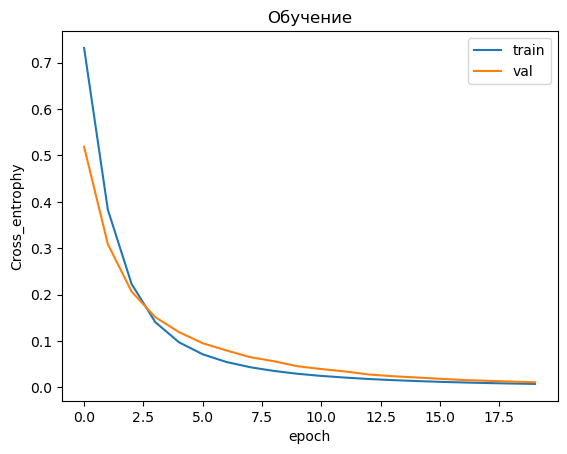

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5387 - val_loss: 0.3853
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2912 - val_loss: 0.2177
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1583 - val_loss: 0.1352
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0969 - val_loss: 0.0900
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0587 - val_loss: 0.0653
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0427 - val_loss: 0.0529
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0329 - val_loss: 0.0435
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0346
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0292
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0241
Epoch

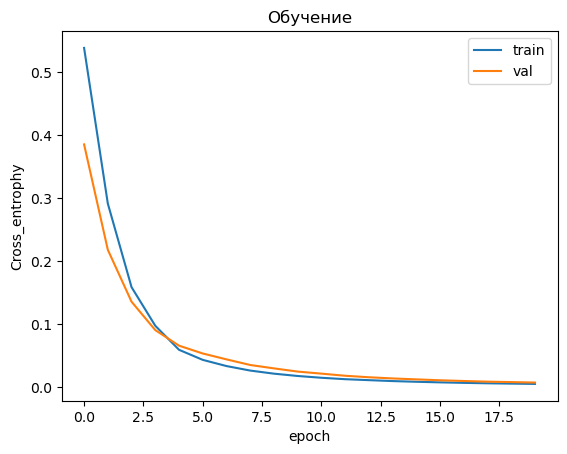

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5335 - val_loss: 0.4152
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 0.2957
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2757 - val_loss: 0.1986
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1904 - val_loss: 0.1252
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.0738
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0796 - val_loss: 0.0435
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0547 - val_loss: 0.0295
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0410 - val_loss: 0.0208
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0314 - val_loss: 0.0156
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0123
Epoch

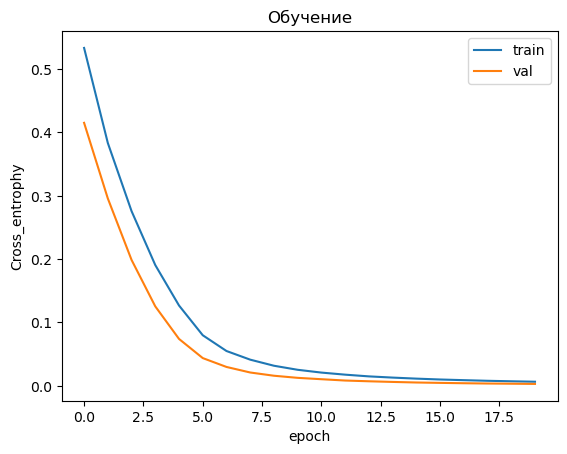

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 1.0578 - val_loss: 0.5161
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.4221 - val_loss: 0.2621
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2542 - val_loss: 0.1630
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1731 - val_loss: 0.1085
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1275 - val_loss: 0.0749
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0979 - val_loss: 0.0545
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0772 - val_loss: 0.0403
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0618 - val_loss: 0.0308
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0503 - val_loss: 0.0234
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0414 - val_loss: 0.0188
Epoch

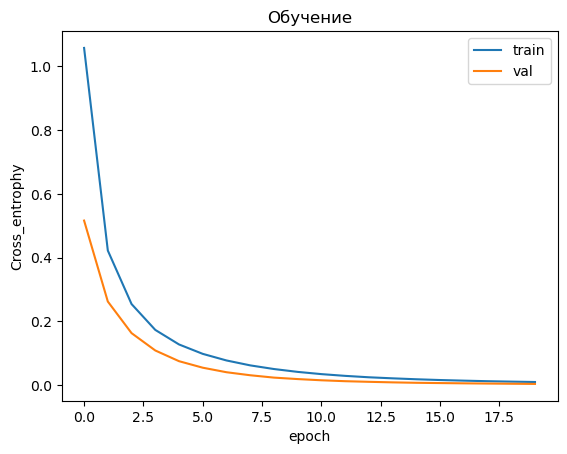

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 1.0165 - val_loss: 0.7382
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.6170 - val_loss: 0.5647
Epoch 3/20
39/39 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 0.4153
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3406 - val_loss: 0.2709
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2376 - val_loss: 0.1722
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1591 - val_loss: 0.1107
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1093 - val_loss: 0.0776
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0796 - val_loss: 0.0564
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0604 - val_loss: 0.0431
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0478 - val_loss: 0.0342
Epoch

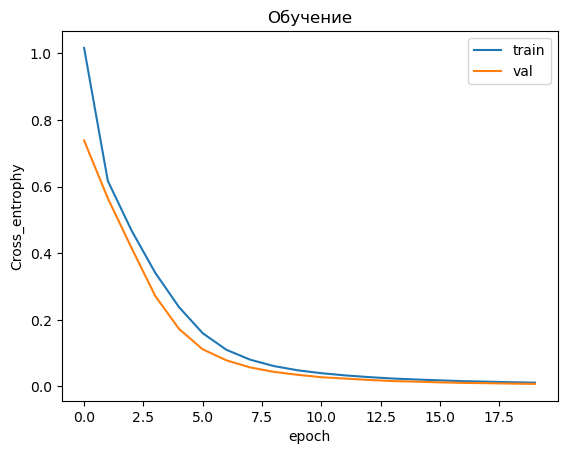

Accuracy: 1.0
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.4456
Epoch 2/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3743 - val_loss: 0.3281
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2576 - val_loss: 0.2342
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1759 - val_loss: 0.1728
Epoch 5/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1243 - val_loss: 0.1315
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0888 - val_loss: 0.0995
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0647 - val_loss: 0.0747
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0463 - val_loss: 0.0584
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0335 - val_loss: 0.0420
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.0324
Epoch

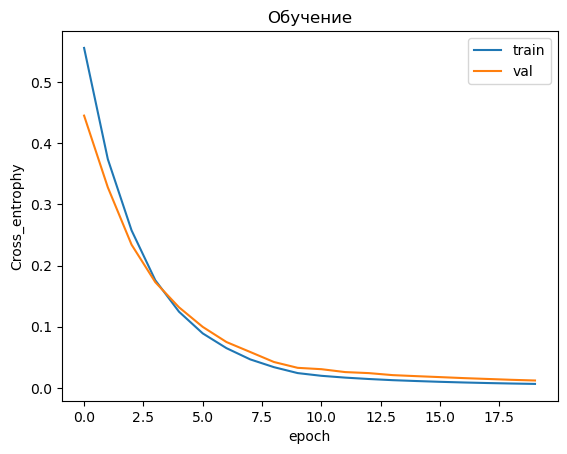

Accuracy: 1.0


In [20]:
# Выполним кросс-валидация (ранее был тест по отложенной выборке)
n_features = X.shape[1] # Размерность X
kfold = StratifiedKFold(10)
scores = []

for train_ix, test_ix in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # Создаем модель
    model = Sequential()
    model.add(Dense(20, activation = 'relu', input_shape = (n_features, )))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    history = model.fit(X_train, y_train,
                    epochs = 20, batch_size = 32,
                    verbose = 1, validation_data = (X_test, y_test))
    yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
    pyplot.title('Обучение')
    pyplot.xlabel('epoch')
    pyplot.ylabel('Cross_entrophy')
    pyplot.plot(history.history['loss'], label = 'train')
    pyplot.plot(history.history['val_loss'], label = 'val')
    pyplot.legend()
    pyplot.show()
    # Валидация прогноза
    score = accuracy_score(y_test, yhat_classes)
    print(f'Accuracy: {score}')
    scores.append(score)    

In [21]:
print(f'Средняя точность при кроссвалидации: {np.mean(scores)}')

Средняя точность при кроссвалидации: 1.0
